# EDA - Covid public media dataset

The goal of this notebook is to perfrom the initial exploratory data analysis (EDA) on the COVID public media dataset. Mainly, I want to inspect the data format, handle the missing elements, and prepare the raw data for the next step.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

For this project I want to use the Covid-19 Public Media Dataset by Anacode from Kaggle. The dataset includes 
- More than 350,000 online articles related to Covid-19
- 65 websites, mostly curated and professional resources
- Main data type: text
- Content focus: non-medical aspects of Covid-19

The data was stored in a csv format on Kaggle. I have downladed the data and in the next step, I load the raw data from the local machine to perform the analysis.

In [2]:
df = pd.read_csv('..\\data\\raw\\covid19_articles_20201231.csv')

First, let's see how many data points and columns we have in this file.

In [3]:
df.shape

(369047, 7)

Next I want to see the first five rows of the dataset.

In [4]:
df.head()

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business
1,Thomas Hughes,2020-01-03,marketbeat,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,The labor markets were one of the most closely...,business
2,Steve Anderson,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,"It could be forgiven, that some might think th...",business
3,Roberto Torres,2020-01-03,ciodive,"On the road to AI adoption, execs grapple with...",https://www.ciodive.com/news/ai-adoption-execs...,CIOs kicked off 2019 with AI as an item to wat...,tech
4,Alden Wicker,2020-01-06,instyle,Red Carpet Sustainability After Coronavirus Sh...,https://www.instyle.com/fashion/red-carpet-cor...,When the coronavirus pandemic is over and life...,consumer


Let's check the type of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369047 entries, 0 to 369046
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   author      181799 non-null  object
 1   date        369047 non-null  object
 2   domain      369047 non-null  object
 3   title       368962 non-null  object
 4   url         369047 non-null  object
 5   content     369047 non-null  object
 6   topic_area  369047 non-null  object
dtypes: object(7)
memory usage: 19.7+ MB


It seems that some columns have missing values. Let's check the exact number.

In [6]:
df.isnull().sum()

author        187248
date               0
domain             0
title             85
url                0
content            0
topic_area         0
dtype: int64

The missing data was found in two columns:
- The ***author*** is missing for about half of the articles. However, it will have limitted impact on this study.
- The ***title*** is missing for 85 cases. It can be a sign of a corrupt data entry. Let's check those data points.

In [7]:
df[df.title.isnull()]

,author,date,domain,title,url,content,topic_area
4093,NaN,2020-02-11,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,"Earnings season. Dominion Energy, Air Liquide,...",business
4889,NaN,2020-02-13,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,"Earnings season. Alibaba Group, Nestlé, Pepsi...",business
5181,NaN,2020-02-14,marketscreener,NaN,https://www.marketscreener.com/news/GLOBAL-MAR...,"Earnings season. AstraZeneca, Crédit Agricole...",business
5626,NaN,2020-02-17,marketscreener,NaN,https://www.marketscreener.com/news/GLOBAL-MAR...,"Earnings season. BHP Group, Deutsche Börse, B...",business
7872,NaN,2020-02-25,marketscreener,NaN,https://www.marketscreener.com/news/GLOBAL-MAR...,"Earnings season. Home Depot, Salesforce.com, A...",business
...,...,...,...,...,...,...,...
347212,NaN,2020-11-20,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,"Earnings season: Naspers, Thai Beverage, Sage ...",business
348155,NaN,2020-11-23,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,"Earnings season. Prosus, Naspers, Agilent, War...",business
349208,NaN,2020-11-24,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,"Earnings season. Medtronic, Xiaomi, VMware, Au...",business
350140,NaN,2020-11-25,marketscreener,NaN,https://www.marketscreener.com/news/latest/GLO...,Gap Inc: its share price collapsed by 11% afte...,business


It seems the 85 article with missing title are business reports. To ensure let's check the domain for those articles.

In [8]:
df[df.title.isnull()].domain.unique()

array(['marketscreener', 'finance.yahoo'], dtype=object)

As seen above the *marketscreener* and *finance.yahoo* are the only two source for those articles. If the content of the articles are valid we can impute the missing title values and keep the data points. Let's check the content of the first row.

In [9]:
df[df.title.isnull()][:1].content.values

array(['Earnings season. Dominion Energy, Air Liquide, Daimler, Hilton, Delivery Hero, Hasbro, Ocado and Randstad are among companies reporting their earnings today. Update. Deutsche Bank has approached Microsoft, Google and Amazon to modernize its technology networks, sources close to the case told Reuters. Virus impact. General Motors plans to suspend production at one of its plants in South Korea on February 17 and 18, as the fallout from the coronavirus epidemic in China has led to a shortage of spare parts, the automaker said. Thank you, Disney. Hasbro jumped by 9 % after announcing a better than expected profit for the fourth quarter, thanks to cost reductions and the success of the "Star Wars" and "Frozen" licenses. Disappointing results. Under Armour said it expects a decline in its annual sales, due to the coronavirus epidemic in China. The share of the sports equipment manufacturer fell by more than 14 % The outcome is nearing. The American justice system could authorize the 

I think the report is valid and can be used in the analysis. Let's keep them for now. The next step is to identify the duplicated items. An article may be published on different domains but ususally the *title* remains the same. Let's check the duplicated titles.

In [10]:
df.duplicated(subset=['title']).sum()

14727

In [11]:
df[df.duplicated(subset=['title'])].title.value_counts().head(30)

Opinion                                                                                     1134
Breakingviews                                                                                175
COVID-19 Impact and Recovery Analysis                                                        102
The Fiver                                                                                     56
Burden of COVID-19 on the Market & Rehabilitation Plan                                        53
COVID-19 Impact & Recovery Analysis                                                           32
Facebook introduces new livestreaming features as demand skyrockets                           14
Op-Ed                                                                                         13
The Breakdown                                                                                 12
PRESS DIGEST-British Business                                                                 12
CNN 10                        

In [12]:
df[df.title == "Why 'Second Life' developer Linden Lab gave up on its VR spin-off"].content

19680    TV and media giants, including streaming servi...
22048    Movie studios have spent years considering rel...
25216    Chances are you're already sharing streaming r...
29606    YouTube is joining Netflix in reducing streami...
31274    Many movie and TV productions have shut down i...
32381    Movie studios are already sending theatrical r...
36134    The next time you load up a YouTube video, it ...
Name: content, dtype: object

About 4% of the rows found as duplicates. The first five items are general titles in news but the more specific titles can be assumed as duplicates. I am not dropping the items now, but will keep in mind to remove them if it impact the analysis. Let's see if any content is duplicated.

In [13]:
df.duplicated(subset=['content']).sum()

127

Dropping the duplicated contents would have minimal impact on the scope of this analysis. I fill the remaining missing titles with the word *missing*. 

In [14]:
values = {"title": 'missing', "author": 'missing'}
df.fillna(value=values, inplace=True)

unique_df = df.drop_duplicates(subset=['content'], keep='first')

The *date* is stored as object. Let's convert that to datetime64.

In [26]:
unique_df['date'] = pd.to_datetime(unique_df['date'])
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368921 entries, 0 to date
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   author      368920 non-null  object        
 1   date        368920 non-null  datetime64[ns]
 2   domain      368920 non-null  object        
 3   title       368920 non-null  object        
 4   url         368920 non-null  object        
 5   content     368920 non-null  object        
 6   topic_area  368920 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 22.5+ MB


<ipython-input-26-174fe462da69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['date'] = pd.to_datetime(unique_df['date'])


In [16]:
unique_df

,author,date,domain,title,url,content,topic_area
0,Thomas Hughes,2020-01-02,marketbeat,Three Industrial Giants You Should Own In 2020,https://www.marketbeat.com/originals/three-ind...,With the end of the year just around the corne...,business
1,Thomas Hughes,2020-01-03,marketbeat,Labor Stocks Are Going To Break Out In 2020,https://www.marketbeat.com/originals/labor-sto...,The labor markets were one of the most closely...,business
2,Steve Anderson,2020-01-03,marketbeat,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",https://www.marketbeat.com/originals/teal-brea...,"It could be forgiven, that some might think th...",business
3,Roberto Torres,2020-01-03,ciodive,"On the road to AI adoption, execs grapple with...",https://www.ciodive.com/news/ai-adoption-execs...,CIOs kicked off 2019 with AI as an item to wat...,tech
4,Alden Wicker,2020-01-06,instyle,Red Carpet Sustainability After Coronavirus Sh...,https://www.instyle.com/fashion/red-carpet-cor...,When the coronavirus pandemic is over and life...,consumer
...,...,...,...,...,...,...,...
369042,Polly Harrison,2020-12-31,thefintechtimes,A Human Touch Will Be a Competitive Edge After...,https://thefintechtimes.com/53867-2/,Niels Pedersen is a Chartered Accountant and S...,finance
369043,missing,2020-12-31,marketscreener,Datametrex AI : Announces Deploying NexaSecuri...,https://www.marketscreener.com/quote/stock/DAT...,Datametrex AI Limited (TSXV: DM) (FSE: D4G) (O...,business
369044,Polly Harrison,2020-12-31,thefintechtimes,"US Payments: Smart Pension, Episode Six, PAAY ...",https://thefintechtimes.com/us-payments-smart-...,"This December, The Fintech Times is asking ind...",finance
369045,missing,2020-12-31,marketscreener,"WESTWATER RESOURCES, INC. : Entry into a Mater...",https://www.marketscreener.com/quote/stock/WES...,Item 1.01Entry into a Material Definitive Agre...,business


Now, let's look at some trends in the data. First, I want to plot the total number of articles per month.

<AxesSubplot:title={'center':'Number of articles per month'}, xlabel='month', ylabel='frequency'>

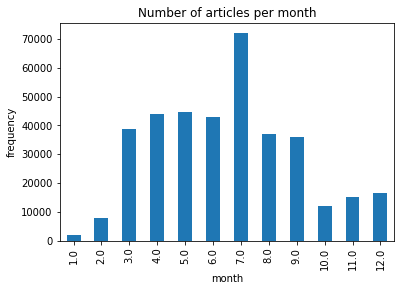

In [27]:
unique_df.title.groupby(unique_df.date.dt.month).count().plot(kind="bar", xlabel='month', ylabel='frequency', title='Number of articles per month')

Next, I want to plot the number of articles by topic area per month. To do this first I need to look at the unique topics.

In [21]:
unique_df.topic_area.value_counts()

business        244422
general          84921
finance          22386
tech              8676
science           3478
consumer          1451
healthcare        1340
automotive         925
environment        777
construction       305
ai                 239
Name: topic_area, dtype: int64

<AxesSubplot:title={'center':'Frequency of Business and Finance articles per month'}, xlabel='month', ylabel='frequency'>

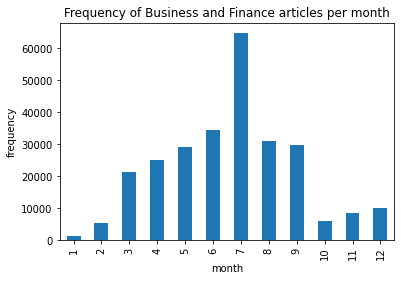

In [22]:
unique_df[unique_df.topic_area.isin(['business','finance'])].title.groupby(unique_df.date.dt.month).count().plot(kind="bar", xlabel='month', ylabel='frequency', title='Frequency of Business and Finance articles per month')